
### Compare the performance of the three model OLS, Ridge and the Lasso on the attached test data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("20.1 Movie_collection_test.csv")
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,11200,520.9220,91.2,0.307,33257.785,173.5,9.135,9.31,9.040,9.335,7.96,308973,184.24,220.896,Drama,30,PG,618,YES
1,14400,304.7240,91.2,0.307,35235.365,173.5,9.120,9.33,9.095,9.305,7.96,374897,146.88,201.152,Comedy,50,PG,703,YES
2,24200,211.9142,91.2,0.307,35574.220,173.5,9.170,9.32,9.115,9.120,7.96,359036,108.84,281.936,Thriller,42,PG,689,NO
3,16600,516.0340,91.2,0.307,29713.695,169.5,9.125,9.31,9.060,9.100,6.96,384237,NaN,301.328,Thriller,40,PG,677,YES
4,17000,850.5840,91.2,0.307,30724.705,158.9,9.050,9.22,9.185,9.330,7.96,312011,169.40,221.360,Comedy,56,PG,615,NO


In [4]:
data.shape

(106, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           106 non-null    int64  
 1   Marketin_expense     106 non-null    float64
 2   Production_expense   106 non-null    float64
 3   Multiplex_coverage   106 non-null    float64
 4   Budget               106 non-null    float64
 5   Movie_length         106 non-null    float64
 6   Lead_ Actor_Rating   106 non-null    float64
 7   Lead_Actress_rating  106 non-null    float64
 8   Director_rating      106 non-null    float64
 9   Producer_rating      106 non-null    float64
 10  Critic_rating        106 non-null    float64
 11  Trailer_views        106 non-null    int64  
 12  Time_taken           102 non-null    float64
 13  Twitter_hastags      106 non-null    float64
 14  Genre                106 non-null    object 
 15  Avg_age_actors       106 non-null    int

In [6]:
data.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             4
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [7]:
mean=data.Time_taken.mean()
data["Time_taken"].fillna(mean,inplace=True)

In [8]:
data.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

### Convert categorical variables to numerical

In [9]:
data.Genre.unique()

array(['Drama', 'Comedy', 'Thriller', 'Action'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Genre"]=le.fit_transform(data['Genre'])

In [11]:
import category_encoders as ce
ce_be = ce.BinaryEncoder(cols=["3D_available"]);
data["3D_available"]=ce_be.fit_transform(data["3D_available"]);

In [12]:
data.drop(["MPAA_film_rating"],axis=1,inplace=True)

In [13]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,3D_available
0,11200,520.9220,91.2,0.307,33257.785,173.5,9.135,9.31,9.040,9.335,7.96,308973,184.24,220.896,2,30,618,0
1,14400,304.7240,91.2,0.307,35235.365,173.5,9.120,9.33,9.095,9.305,7.96,374897,146.88,201.152,1,50,703,0
2,24200,211.9142,91.2,0.307,35574.220,173.5,9.170,9.32,9.115,9.120,7.96,359036,108.84,281.936,3,42,689,1
3,16600,516.0340,91.2,0.307,29713.695,169.5,9.125,9.31,9.060,9.100,6.96,384237,155.86,301.328,3,40,677,0
4,17000,850.5840,91.2,0.307,30724.705,158.9,9.050,9.22,9.185,9.330,7.96,312011,169.40,221.360,1,56,615,1


In [14]:
import statsmodels.api as sm
X=data.drop(["Collection"],axis=1)
y=data["Collection"]

In [15]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,3D_available
0,11200,520.9220,91.2,0.307,33257.785,173.5,9.135,9.31,9.040,9.335,7.96,308973,184.24,220.896,2,30,618,0
1,14400,304.7240,91.2,0.307,35235.365,173.5,9.120,9.33,9.095,9.305,7.96,374897,146.88,201.152,1,50,703,0
2,24200,211.9142,91.2,0.307,35574.220,173.5,9.170,9.32,9.115,9.120,7.96,359036,108.84,281.936,3,42,689,1
3,16600,516.0340,91.2,0.307,29713.695,169.5,9.125,9.31,9.060,9.100,6.96,384237,155.86,301.328,3,40,677,0
4,17000,850.5840,91.2,0.307,30724.705,158.9,9.050,9.22,9.185,9.330,7.96,312011,169.40,221.360,1,56,615,1


In [16]:
# standardize the numerical data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
col=['Marketin_expense','Production_expense','Multiplex_coverage','Budget',
     'Movie_length','Lead_ Actor_Rating','Lead_Actress_rating','Director_rating',
     'Producer_rating','Critic_rating','Trailer_views','Time_taken',
     'Twitter_hastags','Avg_age_actors','Num_multiplex']
X[col]=sc.fit_transform(X[col])


## OLS

By default, the constant $\beta$0 is zero in statsmodels. Thus we add a constant to our dependent variable X

In [17]:
import statsmodels.api as sm
X_cons=sm.add_constant(X)
X_cons
#fit the model
lm_OLS=sm.OLS(y,X_cons).fit()

In [18]:
print(lm_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:             Collection   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     9.970
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           4.33e-14
Time:                        09:06:50   Log-Likelihood:                -1076.3
No. Observations:                 106   AIC:                             2189.
Df Residuals:                      88   BIC:                             2236.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.235e+04   1

In [19]:
# RMSE
from statsmodels.tools.eval_measures import rmse
y_pred=lm_OLS.predict(X_cons)
rmse(y,y_pred)

6213.247900828548

From above result we can observe that R^2 value for our model 0.658 and Adj.R^2 value is 0.592 which is quite low and Prob (F-statistic) is very low. Thus, we can say with confidence that our independent has some effect on our dependent variable.

The variable with lowest p value are Marketin_expense, Multiplex_coverage,Director_rating and Trailer_views. Hence these are the variable which are having highest impact on our dependent variable.

The model coefficients for significant variables can be interpreted as follows:
- If the Marketing Expense is increased by one unit, the Collection will decrease by 2038.9873 units
- If the Multiplex Coverage is increased by one unit, the Collection will increase by 2767.0264 units
- If the Director Rating is increased by one unit, the Collection will increase by 9405.5745 units
- If the Trailer Views is increased by one unit, the Collection will increase by 4106.7468 units

## sklearn

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)


In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(84, 17) (22, 17) (84,) (22,)


In [22]:
from sklearn.linear_model import LinearRegression
lm_SK=LinearRegression()
lm_SK.fit(X_train,y_train)

LinearRegression()

In [23]:
y_test_pred=lm_SK.predict(X_test)
y_train_pred=lm_SK.predict(X_train)

## $R^2$

In [24]:
from sklearn.metrics import r2_score
print("R2 of the training data:",r2_score(y_train,y_train_pred))
print("R2 of the test data:",r2_score(y_test,y_test_pred))

R2 of the training data: 0.6751309176163105
R2 of the test data: 0.41538022660379603


In [25]:
#RMSE

from sklearn.metrics import mean_squared_error

print("The RMSE on the training data:",np.sqrt(mean_squared_error
                                (y_train,y_train_pred)))
print("The RMSE on the test data:",np.sqrt(mean_squared_error
                                (y_test,y_test_pred)))


The RMSE on the training data: 6201.850126531
The RMSE on the test data: 7318.226400749107


## Ridge regression

In [26]:
from sklearn.linear_model import Ridge
lm_ridge=Ridge(alpha=0.5)
lm_ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [27]:
r2_score(y_test,lm_ridge.predict(X_test))

0.42119809256211327

#### $R^2$ score is 42.11% which is very less.

In [28]:
from sklearn.model_selection import validation_curve

param_range=np.logspace(-2,8,100) #creates 100 values b/w 10^-2 & 10^8

In [29]:
train_scores,test_scores=validation_curve(Ridge(),X_train,y_train,
                                          "alpha",param_range)

In [30]:
train_mean=np.mean(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)

In [31]:
max(test_mean)

0.5532070384386633

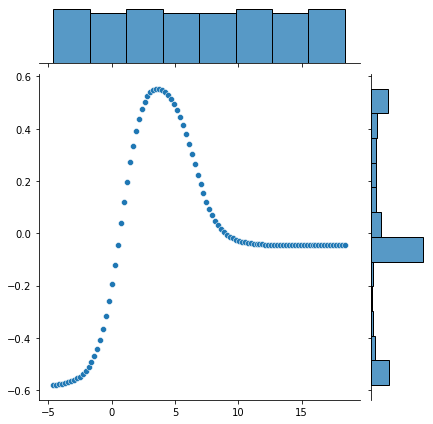

In [32]:
sns.jointplot(x=np.log(param_range),y=test_mean);

In [33]:
#to find location on maximun r2 score value

np.where(test_mean==max(test_mean))

(array([36], dtype=int64),)

#### The location of these maximum test mean is at 36 index.

In [34]:
# to find lambda value of 37 index
param_range[36]

43.28761281083057

In [35]:
# again fit model for lambda=54.6227
lm_ridge_best=Ridge(alpha=param_range[36])

In [36]:
lm_ridge_best.fit(X_train,y_train)

Ridge(alpha=43.28761281083057)

In [37]:
print("R2 of the training data:",r2_score(y_train,
                                lm_ridge_best.predict(X_train)))
print("R2 of the test data:",r2_score(y_test,
                                lm_ridge_best.predict(X_test)))

R2 of the training data: 0.6106303187532278
R2 of the test data: 0.5913502419821439


In [38]:
print("The RMSE on the training data:", np.sqrt(mean_squared_error
                                (y_train,lm_ridge_best.predict(X_train))))
print("The RMSE on the test data:", np.sqrt(mean_squared_error
                                (y_test,lm_ridge_best.predict(X_test))))

The RMSE on the training data: 6789.661794893326
The RMSE on the test data: 6118.496470500617


#### we observe that the model is underfit, performance is not good in both train & test data.

## Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

lm_lasso=Lasso(alpha=0.4)
lm_lasso.fit(X_train,y_train)

Lasso(alpha=0.4)

In [40]:
r2_score(y_test,lm_lasso.predict(X_test))

0.4156808501212822

#### $R^2$ score is 41.56%, which is very less.

In [41]:
param_range_2=np.logspace(-2,8,100)

In [42]:
train_scores_2,test_scores_2=validation_curve(Lasso(),X_train,y_train,
                                "alpha",param_range_2,scoring="r2")

In [43]:
train_mean_2=np.mean(train_scores_2,axis=1)
test_mean_2=np.mean(test_scores_2,axis=1)

In [44]:
max(test_mean_2)

0.5597714427491723

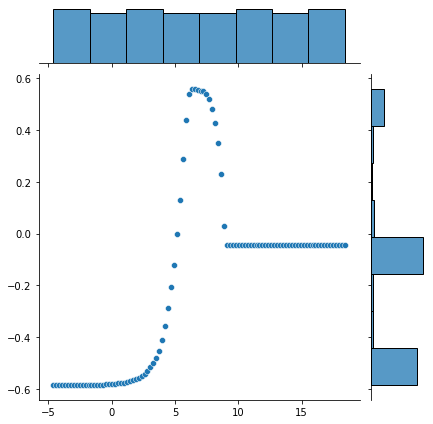

In [45]:
sns.jointplot(x=np.log(param_range_2),y=test_mean_2)

In [46]:
np.where(test_mean_2==max(test_mean_2))

(array([47], dtype=int64),)

In [47]:
lm_lasso_best=Lasso(alpha=param_range_2[47])
lm_lasso_best.fit(X_train,y_train)

Lasso(alpha=559.0810182512223)

In [48]:
print("R2 of the test data:",r2_score(y_test,
                    lm_lasso_best.predict(X_test)))
print("R2 of the training data:",r2_score(y_train,
                    lm_lasso_best.predict(X_train)))

R2 of the test data: 0.5748111960887851
R2 of the training data: 0.6263804421016375


#### we observe that $R^2$ score is improved from 41% to 57% for the test data. However, it is less compared to the $R^2$ score of the training data.

In [49]:
print("The RMSE on the training data:",np.sqrt(mean_squared_error
                    (y_train,lm_lasso_best.predict(X_train))))
print("The RMSE on the test data:",np.sqrt(mean_squared_error
                    (y_test,lm_lasso_best.predict(X_test))))

The RMSE on the training data: 6650.922345232682
The RMSE on the test data: 6241.0836119587075


We observe that the model is underfit. Model performance is not good on both training and testing data. 


we have the following observations:
* For the OLS model, the RMSE is 6213.25
* For the multiple linear regression model of sklearn, the RMSE on test set is 7318.226 and training set is 6201.85
* For the ridge regression model, the RMSE on test set is 6118.496 and training set is 6789.661
* For the lasso regression, the RMSE on test set is 6241.083 and training set is 6650.92


The error is minimum for the lasso regression model. The corresponding $R^2$ score on test data is 57.48%, which is quite low. On comparing different models, we see that the Lasso model has a good performance.